# customers
* 1週間（テストデータとかバリデーションデータ）に含まれるユーザーの学習データにおけるカバレッジ

In [13]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import schema

In [3]:
transactions = pd.read_csv('input/transformed/transactions_train.csv', parse_dates=['t_dat'], usecols=list(schema.TRANSACTIONS.keys())+['t_dat'], dtype=schema.TRANSACTIONS)

In [5]:
valid_start_date = datetime.date(2020, 9, 16)
transactions_train = transactions.query("t_dat < @valid_start_date")
transactions_valid = transactions.query("t_dat >= @valid_start_date")

In [7]:
customers_valid = set(transactions_valid.customer_id_idx)
print(len(customers_valid))

68984


In [14]:
ratios = []
customers = set()
for days in tqdm(range(1, 100)):
    date = valid_start_date - datetime.timedelta(days=days)
    customers |= set(transactions_train.query("t_dat == @date").customer_id_idx)
    ratio = len(customers & customers_valid) / len(customers_valid)
    ratios.append(ratio)

100%|██████████| 99/99 [00:26<00:00,  3.77it/s]


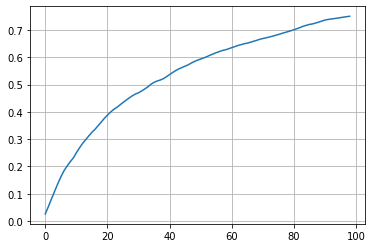

In [17]:
plt.grid()
plt.plot(ratios)